In [1]:
import sys
print(sys.executable)

C:\Users\Kreena\anaconda3\envs\foodie\python.exe


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [4]:
# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
import keras.backend as K
from sklearn.metrics import confusion_matrix, accuracy_score

import tensorflow as tf
import os
#path = r'E:\Large\CATS_DOGS'
path = r'C:\Users\Kreena\Praxis\TERM 3\CAPSTONE\ResNet 101-v2'
os.chdir(path)

Using TensorFlow backend.


In [6]:
from keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.utils import load_img

In [9]:
# Initialising the CNN
classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 14, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3686528   
_________________________________________________________________
dense_4 (Dense)              (None, 14)                1806      
Total para

In [31]:
## steps_per_epoch * batch_size = number_of_rows_in_train_data
## validation_steps = TotalvalidationSamples / ValidationBatchSize

In [11]:
# Part 2 - Fitting the CNN to the images
K.clear_session()

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                                   zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_gen = train_datagen.flow_from_directory('./train',
                        target_size = (128, 128),batch_size = 32, class_mode = 'categorical')

test_gen = test_datagen.flow_from_directory('./test',
                        target_size = (128, 128), batch_size = 32, class_mode = 'categorical', shuffle=False)

Found 698 images belonging to 14 classes.
Found 147 images belonging to 14 classes.


In [12]:
train_gen.class_indices

{'aloo_matar': 0,
 'aloo_tikki': 1,
 'apple': 2,
 'banana': 3,
 'bhatura': 4,
 'bhindi': 5,
 'burger': 6,
 'carrot': 7,
 'cucumber': 8,
 'jalebi': 9,
 'orange': 10,
 'rasgulla': 11,
 'samosa': 12,
 'tomato': 13}

In [13]:
##steps_per_epoch = 8000, validation_steps = 200
hist = classifier.fit(train_gen, epochs =10, validation_data = test_gen)

AttributeError: 'DirectoryIterator' object has no attribute 'ndim'

In [40]:
yt_prob = classifier.predict(test_gen)
yt_pred = np.argmax(yt_prob,axis=1)
y_test = test_gen.classes

2/2 [==============================] - 1s 293ms/step


In [41]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [42]:
yt_prob

array([[9.99209225e-01, 1.57669390e-04, 3.96629230e-06, 2.79209693e-04,
        3.50011920e-04],
       [9.96322487e-05, 4.72156307e-06, 9.95934963e-01, 8.51009816e-07,
        3.95977078e-03],
       [9.96618748e-01, 4.36307164e-04, 4.85261698e-05, 2.07482313e-04,
        2.68894923e-03],
       [6.25064194e-01, 1.92398459e-01, 1.62529561e-03, 2.03609816e-03,
        1.78876042e-01],
       [9.51522589e-01, 2.46399306e-02, 2.56573927e-04, 8.90685432e-03,
        1.46740787e-02],
       [9.16674435e-01, 9.39154008e-04, 7.58227543e-04, 7.25854859e-02,
        9.04263183e-03],
       [9.98571515e-01, 1.37185387e-04, 1.05736990e-05, 2.64803472e-04,
        1.01591181e-03],
       [9.61986303e-01, 1.41441254e-02, 1.59296091e-04, 8.59585498e-03,
        1.51143940e-02],
       [7.04237342e-01, 5.62159196e-02, 1.20132125e-03, 8.57468396e-02,
        1.52598634e-01],
       [4.03599024e-01, 6.61649927e-03, 9.65014771e-02, 3.22043076e-02,
        4.61078674e-01],
       [2.00790510e-01, 3.0552

In [43]:
yt_pred

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 1, 1, 1, 1, 1, 4, 2, 0, 1, 1,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 3, 3, 2, 3, 4,
       3, 3, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4], dtype=int64)

In [44]:
confusion_matrix(y_test, yt_pred)

array([[ 9,  0,  1,  0,  2],
       [ 1,  8,  1,  0,  2],
       [ 0,  0, 12,  0,  0],
       [ 0,  0,  3,  5,  4],
       [ 0,  0,  6,  0,  4]], dtype=int64)

In [45]:
accuracy_score(y_test, yt_pred)

0.6551724137931034

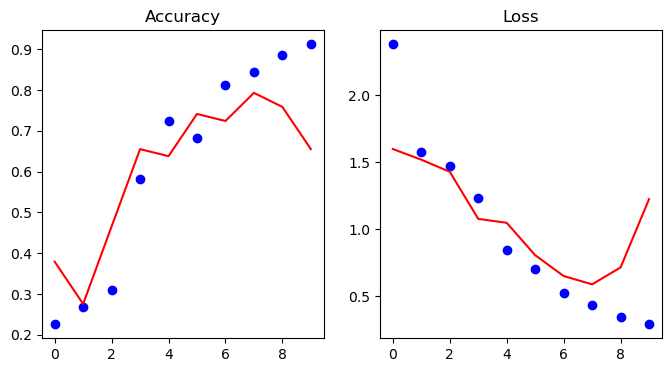

In [46]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'],'bo')
plt.plot(hist.history['val_accuracy'],'r')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(hist.history['loss'], 'bo')
plt.plot(hist.history['val_loss'],'r')
plt.title('Loss')
plt.show()

#### test on burger

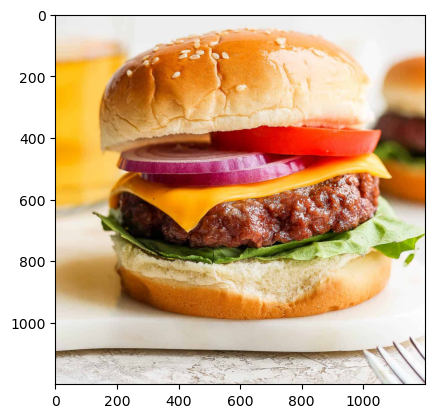

In [51]:
from tensorflow.keras.utils import load_img
test_image = load_img('./new_te/smoked-burgers-recipe-1.jpg')
plt.imshow(test_image)
plt.show()

In [52]:
train_gen.class_indices.keys()

dict_keys(['apple', 'banana', 'bhindi', 'burger', 'chana'])

In [53]:
# Part 3 - Making new predictions
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = load_img('./new_te/smoked-burgers-recipe-1.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
train_gen.class_indices

# if result[0][0] == 1:
#     prediction = 'dog'
# else:
#     prediction = 'cat'
    
# print('Prediction: ', prediction)
print(result)

1/1 [==============================] - 0s 97ms/step
[[0. 0. 0. 1. 0.]]


In [55]:
result

array([[0., 0., 0., 1., 0.]], dtype=float32)

# VGG16 

In [56]:
import glob as glob
import cv2

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [57]:
K.clear_session()
img_size=224
input_shape = (img_size, img_size, 3)
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                                   zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_gen = train_datagen.flow_from_directory('./train',
                        target_size = (img_size, img_size),batch_size = 32, class_mode = 'categorical')
test_gen = test_datagen.flow_from_directory('./test',
                        target_size = (img_size, img_size), batch_size = 32, class_mode = 'categorical', shuffle=False)

Found 239 images belonging to 5 classes.
Found 58 images belonging to 5 classes.


In [98]:
# set up transfer learning on pre-trained ImageNet VGG16 model - remove fully connected layer and replace

vgg16_model = VGG16(weights = 'imagenet', include_top = False, input_shape=input_shape)
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(5, activation = 'softmax')(x)
model = Model(vgg16_model.input, predictions)

In [99]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [100]:
# freeze all layers of the pre-trained model
for layer in vgg16_model.layers:
    layer.trainable = False

In [101]:
# compile the new model using a RMSProp optimizer
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [68]:
# fit the model, log the results and the training time
hist = model.fit(train_gen, epochs = 10, validation_data = test_gen)

Epoch 1/10
8/8 [==============================] - 30s 4s/step - loss: 0.8870 - accuracy: 0.7238 - val_loss: 0.8467 - val_accuracy: 0.6552
Epoch 2/10
8/8 [==============================] - 28s 4s/step - loss: 0.5964 - accuracy: 0.8243 - val_loss: 0.6800 - val_accuracy: 0.7414
Epoch 3/10
8/8 [==============================] - 29s 4s/step - loss: 0.4507 - accuracy: 0.8536 - val_loss: 0.6109 - val_accuracy: 0.7759
Epoch 4/10
8/8 [==============================] - 28s 4s/step - loss: 0.3349 - accuracy: 0.9121 - val_loss: 0.5318 - val_accuracy: 0.7931
Epoch 5/10
8/8 [==============================] - 28s 4s/step - loss: 0.2802 - accuracy: 0.9289 - val_loss: 0.5264 - val_accuracy: 0.8103
Epoch 6/10
8/8 [==============================] - 28s 4s/step - loss: 0.2458 - accuracy: 0.9247 - val_loss: 0.4681 - val_accuracy: 0.7931
Epoch 7/10
8/8 [==============================] - 28s 4s/step - loss: 0.2123 - accuracy: 0.9331 - val_loss: 0.4773 - val_accuracy: 0.8448
Epoch 8/10
8/8 [==================

In [69]:
# evaluate the performance the new model and report the results
score = model.evaluate(test_gen)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

2/2 [==============================] - 6s 2s/step - loss: 0.4494 - accuracy: 0.8103
Test Score: 0.4494403600692749
Test Accuracy: 0.8103448152542114


### Testing for Accuracy

In [72]:
# yt_prob = model.predict(test_gen)
# yt_pred = np.where(yt_prob>=0.5,1,0)
# y_test = test_gen.classes

yt_prob = model.predict(test_gen)
yt_pred = np.argmax(yt_prob, axis=1)
y_test = test_gen.classes

2/2 [==============================] - 7s 2s/step


In [73]:
confusion_matrix(y_test, yt_pred)

array([[12,  0,  0,  0,  0],
       [ 1, 11,  0,  0,  0],
       [ 0,  0, 11,  0,  1],
       [ 0,  1,  2,  9,  0],
       [ 0,  0,  6,  0,  4]], dtype=int64)

In [74]:
accuracy_score(y_test, yt_pred)

0.8103448275862069

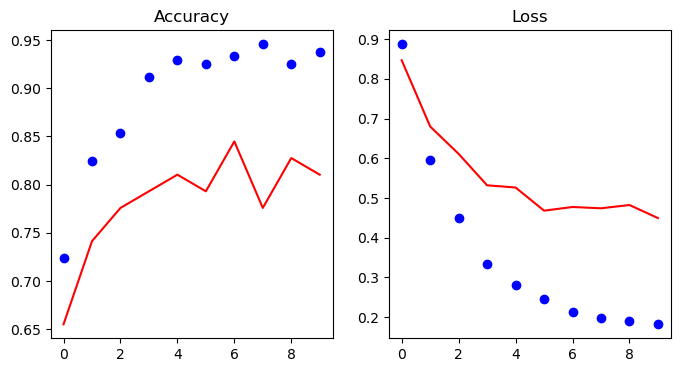

In [75]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'],'bo')
plt.plot(hist.history['val_accuracy'],'r')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(hist.history['loss'], 'bo')
plt.plot(hist.history['val_loss'],'r')
plt.title('Loss')
plt.show()

In [76]:
train_gen.class_indices.keys()

dict_keys(['apple', 'banana', 'bhindi', 'burger', 'chana'])

#### test on bhindi 

In [97]:
# Part 3 - Making new predictions
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = load_img('./new_te/bhindi_masala.jpeg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_gen.class_indices

# if result[0][0] == 1:
#     prediction = 'dog'
# else:
#     prediction = 'cat'
    
# print('Prediction: ', prediction)
print(result)

ValueError: in user code:

    File "C:\Users\Kreena\anaconda3\envs\deep_learning\lib\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Kreena\anaconda3\envs\deep_learning\lib\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Kreena\anaconda3\envs\deep_learning\lib\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Kreena\anaconda3\envs\deep_learning\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "C:\Users\Kreena\anaconda3\envs\deep_learning\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Kreena\anaconda3\envs\deep_learning\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_1" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 128, 128, 3)


#### test on chana

In [79]:
# Part 3 - Making new predictions                  ################ wrong
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = load_img('./new_te/chana_masala.jpeg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
train_gen.class_indices

# if result[0][0] == 1:
#     prediction = 'dog'
# else:
#     prediction = 'cat'
    
# print('Prediction: ', prediction)
print(result)

1/1 [==============================] - 0s 29ms/step
[[0. 0. 1. 0. 0.]]


#### test on banana

In [80]:
# Part 3 - Making new predictions
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = load_img('./new_te/banana.jpeg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
train_gen.class_indices

# if result[0][0] == 1:
#     prediction = 'dog'
# else:
#     prediction = 'cat'
    
# print('Prediction: ', prediction)
print(result)

1/1 [==============================] - 0s 29ms/step
[[0. 1. 0. 0. 0.]]


#### test on apple

In [81]:
# Part 3 - Making new predictions
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = load_img('./new_te/apple.jpeg', target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
train_gen.class_indices

# if result[0][0] == 1:
#     prediction = 'dog'
# else:
#     prediction = 'cat'
    
# print('Prediction: ', prediction)
print(result)

1/1 [==============================] - 0s 32ms/step
[[1. 0. 0. 0. 0.]]


### hyper parameter tunning on vgg16 for 10 classes

In [2]:
import glob as glob
import cv2

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [6]:
K.clear_session()
img_size=224
input_shape = (img_size, img_size, 3)
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                                   zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_gen = train_datagen.flow_from_directory('./train',
                        target_size = (img_size, img_size),batch_size = 32, class_mode = 'categorical')
test_gen = test_datagen.flow_from_directory('./test',
                        target_size = (img_size, img_size), batch_size = 32, class_mode = 'categorical', shuffle=False)

Found 499 images belonging to 10 classes.
Found 107 images belonging to 10 classes.


In [7]:
# set up transfer learning on pre-trained ImageNet VGG16 model - remove fully connected layer and replace

vgg16_model = VGG16(weights = 'imagenet', include_top = False, input_shape=input_shape)
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation = 'softmax')(x)
model = Model(vgg16_model.input, predictions)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
# freeze all layers of the pre-trained model
for layer in vgg16_model.layers:
    layer.trainable = False

In [10]:
# compile the new model using a RMSProp optimizer
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
# fit the model, log the results and the training time
hist = model.fit(train_gen, epochs = 25, validation_data = test_gen)

Epoch 1/25
 7/16 [============>.................] - ETA: 25s - loss: 2.3303 - accuracy: 0.1943

C:\Users\Kreena\anaconda3\envs\deep_learning\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 56s 3s/step - loss: 2.1843 - accuracy: 0.2265 - val_loss: 1.8185 - val_accuracy: 0.3925
Epoch 2/25
16/16 [==============================] - 53s 3s/step - loss: 1.3645 - accuracy: 0.5892 - val_loss: 1.1783 - val_accuracy: 0.5701
Epoch 3/25
16/16 [==============================] - 53s 3s/step - loss: 0.9278 - accuracy: 0.6754 - val_loss: 0.8875 - val_accuracy: 0.6822
Epoch 4/25
16/16 [==============================] - 53s 3s/step - loss: 0.6672 - accuracy: 0.7715 - val_loss: 0.8834 - val_accuracy: 0.6916
Epoch 5/25
16/16 [==============================] - 54s 3s/step - loss: 0.5135 - accuracy: 0.8216 - val_loss: 0.7729 - val_accuracy: 0.7103
Epoch 6/25
16/16 [==============================] - 53s 3s/step - loss: 0.4293 - accuracy: 0.8577 - val_loss: 0.7898 - val_accuracy: 0.7196
Epoch 7/25
16/16 [==============================] - 53s 3s/step - loss: 0.3024 - accuracy: 0.8858 - val_loss: 0.6369 - val_accuracy: 0.7850
Epoch 8/25
16/16 [=============

In [12]:
# evaluate the performance the new model and report the results
score = model.evaluate(test_gen)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

4/4 [==============================] - 10s 2s/step - loss: 0.6970 - accuracy: 0.8131
Test Score: 0.69704669713974
Test Accuracy: 0.8130841255187988


### Testing for Accuracy

In [13]:
# yt_prob = model.predict(test_gen)
# yt_pred = np.where(yt_prob>=0.5,1,0)
# y_test = test_gen.classes

yt_prob = model.predict(test_gen)
yt_pred = np.argmax(yt_prob, axis=1)
y_test = test_gen.classes

4/4 [==============================] - 10s 2s/step


In [14]:
confusion_matrix(y_test, yt_pred)

array([[10,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  2,  0,  0,  3,  0,  0],
       [ 0,  0, 11,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  1, 10,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  8,  0,  0,  1,  0,  0],
       [ 1,  0,  0,  0,  0, 11,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  2,  0,  9,  0,  0,  0],
       [ 1,  1,  0,  0,  1,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  0,  2,  1,  0,  0,  6,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10]], dtype=int64)

In [15]:
accuracy_score(y_test, yt_pred)

0.8130841121495327

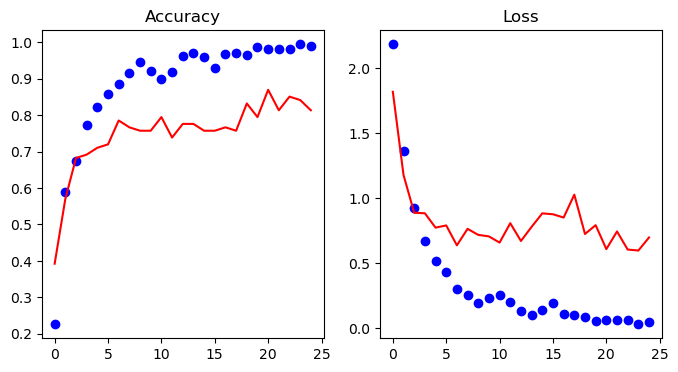

In [16]:
plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'],'bo')
plt.plot(hist.history['val_accuracy'],'r')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(hist.history['loss'], 'bo')
plt.plot(hist.history['val_loss'],'r')
plt.title('Loss')
plt.show()

In [17]:
train_gen.class_indices.keys()

dict_keys(['aloo_matar', 'aloo_tikki', 'apple', 'banana', 'bhatura', 'bhindi', 'burger', 'daal_baati_churma', 'jalebi', 'rasgulla'])

In [100]:
def label(result):
    if (np.argmax(result)==0):
        return('alloo_matar')
    elif (np.argmax(result)==1):
        return('aloo_tikki')
    elif (np.argmax(result)==2):
        return('apple')
    elif (np.argmax(result)==3):
        return('banana')
    elif (np.argmax(result)==4):
        return('bhatura')
    elif (np.argmax(result)==5):
        return('bhindi')
    elif (np.argmax(result)==6):
        return('burger')
    elif (np.argmax(result)==7):
        return('daal_bati_churma')
    elif (np.argmax(result)==8):
        return('jalebi')
    else:
        return('rasgulla')

#### test on bhindi 

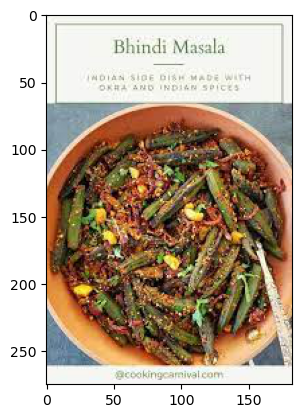

In [84]:
from tensorflow.keras.utils import load_img
test_image = load_img('./new_te/bhindi_masala.jpeg')
plt.imshow(test_image)
plt.show()

In [85]:
# Part 3 - Making new predictions
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = load_img('./new_te/bhindi_masala.jpeg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_gen.class_indices

label(result)

1/1 [==============================] - 0s 158ms/step


'bhindi'

#### test on apple

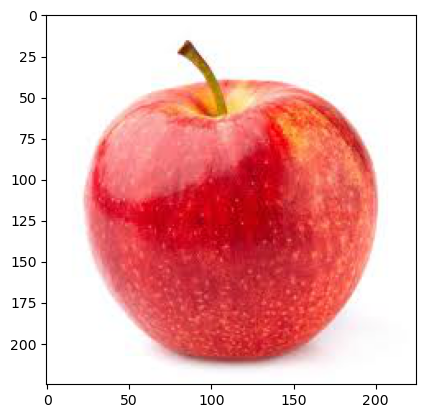

In [86]:
from tensorflow.keras.utils import load_img
test_image = load_img('./new_te/apple.jpeg')
plt.imshow(test_image)
plt.show()

In [87]:
# Part 3 - Making new predictions
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = load_img('./new_te/apple.jpeg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_gen.class_indices

label(result)

1/1 [==============================] - 0s 152ms/step


'apple'

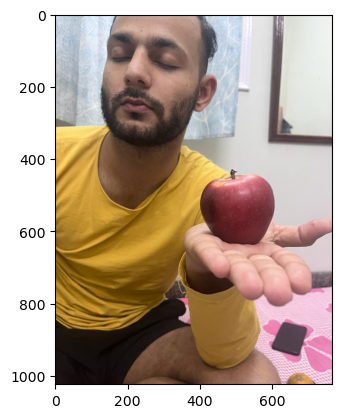

In [101]:
from tensorflow.keras.utils import load_img
test_image = load_img('./new_te/app.jpg')
plt.imshow(test_image)
plt.show()

In [102]:
# Part 3 - Making new predictions
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = load_img('./new_te/app.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_gen.class_indices

label(result)

1/1 [==============================] - 0s 169ms/step


'daal_bati_churma'

#### test on alloo

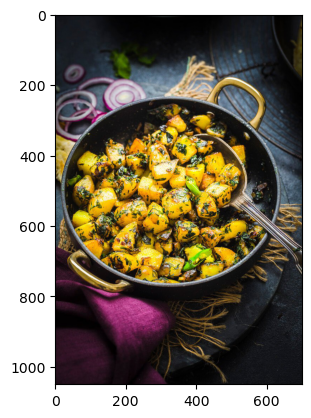

In [91]:
from tensorflow.keras.utils import load_img
test_image = load_img('./new_te/7b9bfef079.jpg')
plt.imshow(test_image)
plt.show()

In [92]:
# Part 3 - Making new predictions
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = load_img('./new_te/7b9bfef079.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_gen.class_indices

label(result)

1/1 [==============================] - 0s 157ms/step


'alloo_matar'

#### test on daal batti

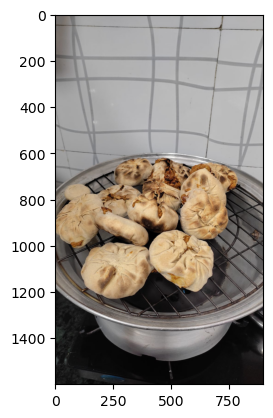

In [103]:
from tensorflow.keras.utils import load_img
test_image = load_img('./new_te/db1.jpg')
plt.imshow(test_image)
plt.show()

In [104]:
# Part 3 - Making new predictions
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = load_img('./new_te/db1.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_gen.class_indices

label(result)

1/1 [==============================] - 0s 177ms/step


'daal_bati_churma'

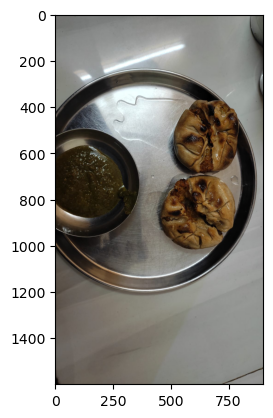

In [105]:
from tensorflow.keras.utils import load_img
test_image = load_img('./new_te/db2.jpg')
plt.imshow(test_image)
plt.show()

In [106]:
# Part 3 - Making new predictions
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = load_img('./new_te/db2.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_gen.class_indices

label(result)

1/1 [==============================] - 0s 169ms/step


'alloo_matar'

#### test on aloo tikki

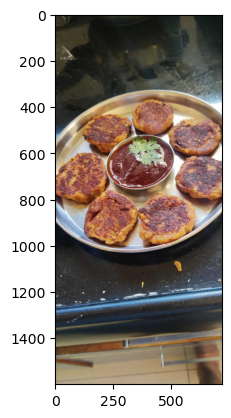

In [107]:
from tensorflow.keras.utils import load_img
test_image = load_img('./new_te/at1.jpg')
plt.imshow(test_image)
plt.show()

In [109]:
# Part 3 - Making new predictions
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = load_img('./new_te/at1.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_gen.class_indices

label(result)

1/1 [==============================] - 0s 170ms/step


'alloo_matar'

#### test on burger

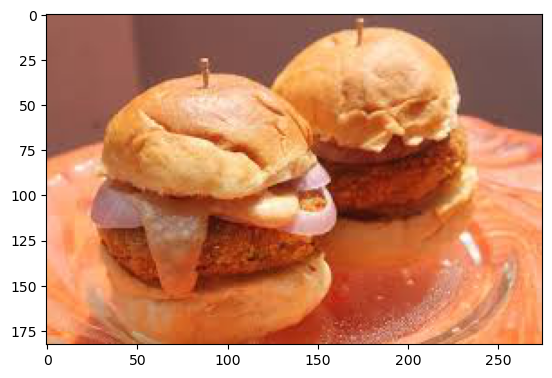

In [110]:
from tensorflow.keras.utils import load_img
test_image = load_img('./new_te/bur.jpeg')
plt.imshow(test_image)
plt.show()

In [111]:
# Part 3 - Making new predictions
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = load_img('./new_te/bur.jpeg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_gen.class_indices

label(result)

1/1 [==============================] - 0s 173ms/step


'burger'

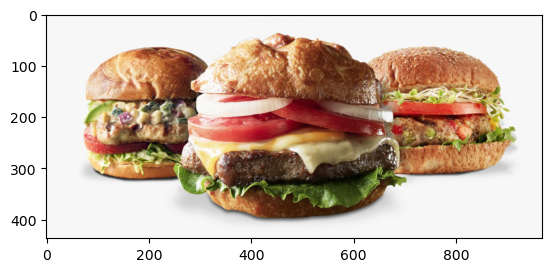

In [112]:
from tensorflow.keras.utils import load_img
test_image = load_img('./new_te/b2.jpg')
plt.imshow(test_image)
plt.show()

In [113]:
# Part 3 - Making new predictions
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = load_img('./new_te/b2.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_gen.class_indices

label(result)

1/1 [==============================] - 0s 170ms/step


'burger'

#### test on jalebi

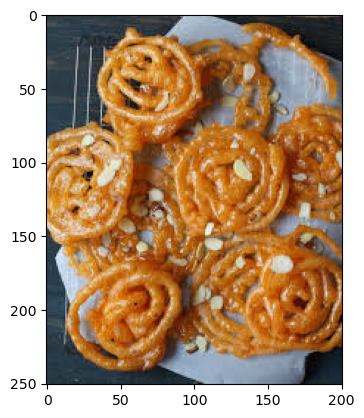

In [114]:
from tensorflow.keras.utils import load_img
test_image = load_img('./new_te/j2.jpeg')
plt.imshow(test_image)
plt.show()

In [115]:
# Part 3 - Making new predictions
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = load_img('./new_te/j2.jpeg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_gen.class_indices

label(result)

1/1 [==============================] - 0s 179ms/step


'jalebi'

#### test on rasgulla

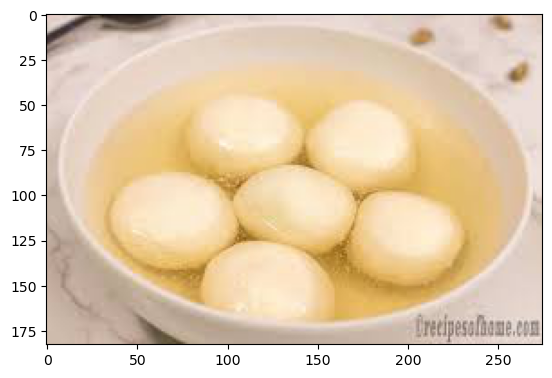

In [116]:
from tensorflow.keras.utils import load_img
test_image = load_img('./new_te/r.jpeg')
plt.imshow(test_image)
plt.show()

In [117]:
# Part 3 - Making new predictions
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = load_img('./new_te/r.jpeg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_gen.class_indices

label(result)

1/1 [==============================] - 0s 202ms/step


'rasgulla'